In [32]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import ttest_ind

In [13]:
nuclear_data = pd.read_csv("../eco_v_nukes/data/archive-4/nuclear_weapons_stockpiles.csv")
nuclear_data.head()

,country_name,year,nuclear_weapons_stockpile
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0


In [14]:
nuclear_data.sample(100)

,country_name,year,nuclear_weapons_stockpile
114,France,1981,274
18,China,1963,0
706,United States,1949,170
108,France,1975,188
73,China,2018,280
...,...,...,...
60,China,2005,235
6,China,1951,0
96,France,1963,0
59,China,2004,235


In [15]:
nuclear_data.describe()

,year,nuclear_weapons_stockpile
count,780.000000,780.000000
mean,1983.500000,2686.524359
std,22.529256,7221.198864
min,1945.000000,0.000000
25%,1964.000000,0.000000
50%,1983.500000,43.500000
75%,2003.000000,300.000000
max,2022.000000,40159.000000


In [16]:
aggregated_df = nuclear_data.groupby('country_name')['nuclear_weapons_stockpile'].sum().reset_index()
aggregated_df.columns = ['Country', 'total_nuclear_weapons_stockpile']
print (aggregated_df)

# Totals from 1945 to 2022

          Country  total_nuclear_weapons_stockpile
0           China                            12199
1          France                            17312
2           India                             1977
3          Israel                             3077
4     North Korea                              150
5        Pakistan                             2164
6          Russia                           964920
7    South Africa                               30
8  United Kingdom                            19250
9   United States                          1074410


In [25]:
data = {
    'Country': ['China', 'France ', 'India', 'Israel', 'North Korea', 'Pakistan', 'Russia', 'South Africa', 'United Kingdom', 'United States'],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [350, 290, 160, 90, 20, 165,  4477, 0, 180,  3708]
}

df = pd.DataFrame(data)

# Filtered using Boolean Indexing
df_2022 = df[df['Year'] == 2022]
print("Filtered DataFrame using boolean indexing:")
print(df_2022)

Filtered DataFrame using boolean indexing:
          Country  Year  Value
0           China  2022    350
1         France   2022    290
2           India  2022    160
3          Israel  2022     90
4     North Korea  2022     20
5        Pakistan  2022    165
6          Russia  2022   4477
7    South Africa  2022      0
8  United Kingdom  2022    180
9   United States  2022   3708


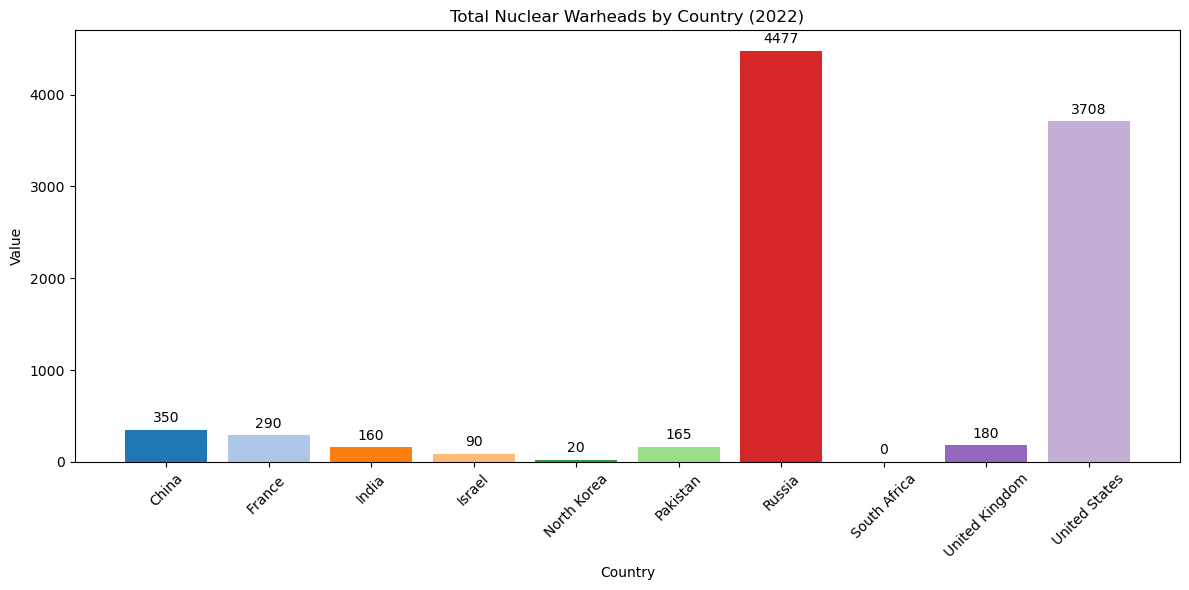

In [31]:

# Create a bar graph with each bar in a different color using a distinct color palette
plt.figure(figsize=(12, 6))
bars = plt.bar(df_2022['Country'], df_2022['Value'], color=plt.cm.tab20.colors[:len(df_2022)])

# Add title and labels
plt.title('Total Nuclear Warheads by Country (2022)')
plt.xlabel('Country')
plt.ylabel('Value')

# Add the total number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
nuke_current = pd.read_csv("../eco_v_nukes/data/2024 nuke.csv")
nuke_current.head(10)

#2024 current amounts

,Country,Deployed Nonstrategic,Deployed Strategic,Reserve/ Nondeployed,Retired,SUM([Deployed Strategic] + [Deployed Nonstrategic] + [Reserve...,Total Inventory
0,Russia,0,1710,2670,1200.0,5580.0,5580
1,United States,100,1670,1938,1336.0,5044.0,5044
2,France,0,280,10,NaN,NaN,290
3,China,0,24,476,NaN,NaN,500
4,United Kingdom,0,120,105,NaN,NaN,225
5,Israel,0,0,90,NaN,NaN,90
6,Pakistan,0,0,170,NaN,NaN,170
7,India,0,0,172,NaN,NaN,172
8,North Korea,0,0,50,NaN,NaN,50


In [ ]:
'''current_bar_data = {
    'Country': ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea'],
    'Deployed Nonstrategic': [0, 100, 0, 0, 0, 0, 0, 0, 0],
    'Deployed Strategic': [1710, 1670, 280, 24, 120, 0, 0, 0, 0],
    'Reserve/ Nondeployed': [2670, 1938, 10, 476, 105, 90, 170, 172, 50],
    'Retired': [1200, 1336, None, None, None, None, None, None, None],
    'Total Inventory': [5580, 5044, 290, 500, 225, 90, 170, 172, 50]
}
'''

df = pd.DataFrame(nuke_current)

# Melt the DataFrame for plotting
df_melted = df.melt(id_vars=['Country'], value_vars=['Deployed Nonstrategic', 'Deployed Strategic', 'Reserve/ Nondeployed', 'Retired'], var_name='Category', value_name='Value')

# Create the base figure
fig = go.Figure()

# Define colors for each category
colors = {
    'Deployed Nonstrategic': 'skyblue',
    'Deployed Strategic': 'orange',
    'Reserve/ Nondeployed': 'green',
    'Retired': 'red'
}

# Add bar traces for each category
for category in colors.keys():
    filtered_df = df_melted[df_melted['Category'] == category]
    fig.add_trace(go.Bar(
        x=filtered_df['Country'],
        y=filtered_df['Value'],
        name=category,
        marker_color=colors[category],
        text=filtered_df['Value'],
        textposition='inside'
    ))

# Add total inventory numbers on top
for i, country in enumerate(df['Country']):
    fig.add_annotation(
        x=country,
        y=df['Total Inventory'][i] + 100,  # Adjust the y position slightly above the highest bar
        text=f'Total: {df["Total Inventory"][i]}',
        showarrow=False,
        font=dict(size=12, color="black")
    )

# Update the layout
fig.update_layout(
    barmode='stack',
    title='Estimated Nuclear Inventory by Country and Status (2024)',
    xaxis_title='Country',
    yaxis_title='Count',
    legend_title='Status',
    title_x=0.5
)

fig.show()

In [ ]:
data = {
    'Country': ['Russia', 'United States', 'France', 'China', 'United Kingdom', 'Israel', 'Pakistan', 'India', 'North Korea'],
    'ISO_A3': ['RUS', 'USA', 'FRA', 'CHN', 'GBR', 'ISR', 'PAK', 'IND', 'PRK'],
    'Deployed Nonstrategic': [0, 100, 0, 0, 0, 0, 0, 0, 0],
    'Deployed Strategic': [1710, 1670, 280, 24, 120, 0, 0, 0, 0],
    'Reserve/ Nondeployed': [2670, 1938, 10, 476, 105, 90, 170, 172, 50],
    'Retired': [1200, 1336, None, None, None, None, None, None, None],
    'Total Inventory': [5580, 5044, 290, 500, 225, 90, 170, 172, 50]
}

df = pd.DataFrame(data)

# Create a 3D globe plot with dynamic color scaling
fig = px.scatter_geo(df,
                     locations="ISO_A3",
                     hover_name="Country",
                     size="Total Inventory",  # Adjust size based on total inventory
                     projection="natural earth",
                     title="Estimated Global Nuclear Warhead Inventories (2024)",
                     template="plotly_dark",
                     color="Total Inventory",
                     color_continuous_scale=px.colors.sequential.Plasma,  # Dynamic color scale
                     hover_data={
                         'Deployed Nonstrategic': True,
                         'Deployed Strategic': True,
                         'Reserve/ Nondeployed': True,
                         'Retired': True,
                         'Total Inventory': False
                     })

# Update the layout for a better visual presentation
fig.update_geos(showcountries=True, countrycolor="White")
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    geo=dict(
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="Navy",
        showlakes=True, lakecolor="LightBlue",
        showrivers=True, rivercolor="LightBlue"
    ),
    coloraxis_colorbar=dict(
        title='Total Inventory',
        thicknessmode='pixels', thickness=20,
        lenmode='pixels', len=200
    ),
    legend=dict(
        title="Nuclear Inventory",
        title_font_size=16,
        traceorder="normal",
        font=dict(
            size=12,
            color="white"
        ),
        bgcolor="LightSkyBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

In [39]:
# Rename the dataset to a more meaningful name
GlobalEconomicIndicators = data_economic_indicators_new()

# Display the first few rows to confirm the renaming
print(GlobalEconomicIndicators.head())

NameError: name 'data_economic_indicators_new' is not defined